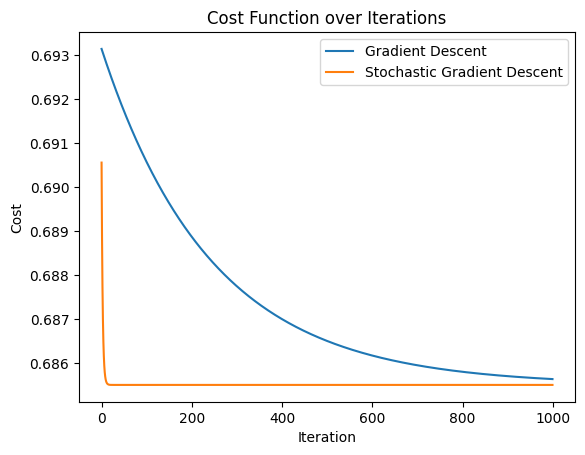

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# logistic regression using gradient descent
def logistic_regression_gradient(X, y, alpha=0.01, iterations=1000):
    m, n = X.shape
    X = np.insert(X, 0, 1, axis=1)  # add bias term
    theta = np.zeros((n + 1, 1))

    J_history = np.zeros(iterations)
    for i in range(iterations):
        h = sigmoid(X @ theta)
        J = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
        grad = (1/m) * X.T @ (h - y)
        theta = theta - alpha * grad
        J_history[i] = J

    return theta, J_history

# logistic regression using stochastic gradient descent
def logistic_regression_stochastic(X, y, alpha=0.01, iterations=1000):
    m, n = X.shape
    X = np.insert(X, 0, 1, axis=1)  # add bias term
    theta = np.zeros((n + 1, 1))

    J_history = np.zeros(iterations)
    for i in range(iterations):
        for j in range(m):
            h = sigmoid(X[j] @ theta)
            grad = X[j][:, np.newaxis] * (h - y[j])
            theta = theta - alpha * grad
        h = sigmoid(X @ theta)
        J = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
        J_history[i] = J

    return theta, J_history

# generate random data
np.random.seed(123)
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, size=(100, 1))

# run logistic regression with gradient descent
theta_gd, J_history_gd = logistic_regression_gradient(X, y)

# run logistic regression with stochastic gradient descent
theta_sgd, J_history_sgd = logistic_regression_stochastic(X, y)

# plot cost function over iterations
plt.plot(range(len(J_history_gd)), J_history_gd, label='Gradient Descent')
plt.plot(range(len(J_history_sgd)), J_history_sgd, label='Stochastic Gradient Descent')
plt.title('Cost Function over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()
